In [1]:
%matplotlib inline 
import numpy as np                       
from matplotlib import pyplot as plt      
import time, sys                   

### Постановка и сеточные параметры

Рассмотрим задачу об эволюции ступеньки. Численное решается уравнение переноса с коэффициентом переноса $c$.

In [2]:
nx = 41  # количество узлов по пространству
dx = 2 / (nx-1) # шаг по пространству
nt = 25    # количество узлов по времени
dt = .025  # шаг по времени
T = dt*(nt-1)
c = 1      # скорость распространения возмущения (коэффициент переноса)
x_mesh = np.linspace(0, 2, nx) #сетка по пространству
r = c*dt/dx # число Куранта
print('r = ', r)
print('T = ', T)

r =  0.5
T =  0.6000000000000001


#### Начальные условия

Зададим $u(x, 0) = 2$ при $x \in [0.5, 1]$ и $u(x, 0) = 1$ иначе во всей расчетной области. Такая функция называется "ступенька". 

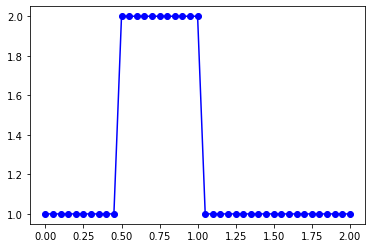

In [3]:
u_init = np.ones(nx)      
u_init[int(.5 / dx):int(1 / dx + 1)] = 2  
plt.plot(x_mesh, u_init, '-bo')

#### Точное решение

К моменту времени T ступенька просто сдвинется вправо

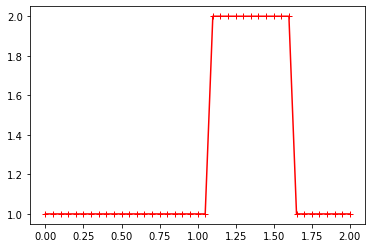

In [4]:
u_exact = np.ones(nx)      
u_exact[int((.5+c*T) / dx):int((1+c*T) / dx + 1)] = 2  
plt.plot(x_mesh, u_exact, '-r+')

### Численное решение

#### Часть 1. Явный левый уголок
Сначала примените схему Явный левый уголок (Upwind scheme). Провести расчеты для $nx = 41; 81; 121$. Построить графики решения

In [5]:
un = np.ones(nx) # инициализация вспомогательного массива для хранения
                 # данных с предыдущего шага
u = u_init.copy()
for n in range(1, nt):  # шагаем по времени
    un = u.copy() # заполняем данными с предыдущего шага
    for i in range(1, nx): # шагаем по пространству
        u[i] = un[i] - r*(un[i] - un[i-1])

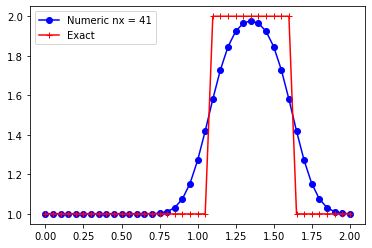

In [6]:
plt.plot(x_mesh, u, '-bo', label = 'Numeric nx = ' + str(nx))
plt.plot(x_mesh, u_exact, '-r+', label = 'Exact')
plt.legend()

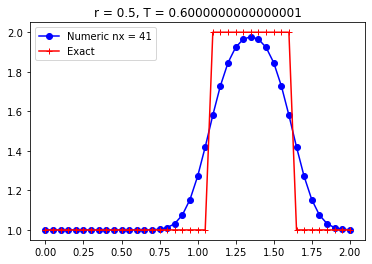

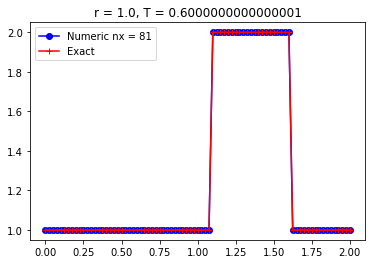

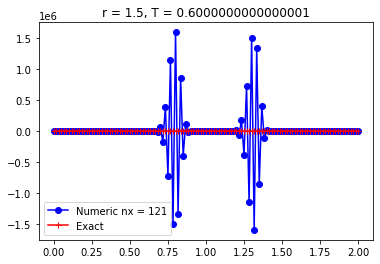

In [8]:
nx_list = [41,81,121]
for nx in nx_list:
    # продублируем код из примера
    dx = 2 / (nx - 1)
    nt = 25
    dt = .025
    T = dt * (nt - 1)
    c = 1
    x_mesh = np.linspace(0, 2, nx)
    r = c * dt / dx

    u_init = np.ones(nx)      
    u_init[int(0.5 / dx) : int(1 / dx + 1)] = 2  
    u_exact = np.ones(nx)      
    u_exact[int((0.5 + c * T) / dx) : int((1 + c * T) / dx + 1)] = 2  

    # схема явный уголок из примера
    un = np.ones(nx)
    u = u_init.copy()
    for n in range(1, nt):
        un = u.copy()
        for i in range(1, nx):
            u[i] = un[i] - r * (un[i] - un[i - 1])

    # построение графиков для различных параметров
    plt.plot(x_mesh, u, '-bo', label = 'Numeric nx = ' + str(nx))
    plt.plot(x_mesh, u_exact, '-r+', label = 'Exact')
    plt.title('r = {}, T = {}'.format(r, T))
    plt.legend()
    plt.show()

0. Какой у схемы порядок аппроксимации?
1. Удалось ли получить решение? Почему?
2. Сколько граничных условий и где нужно поставить в этой задаче?
3. Почему в задаче явно нигде не инициализируются граничные условия?
4. Почему в цикле по пространству индексация с 1?
5. Можно ли решить задачу схемой Явный правый уголок?
6. Почему при решении на 41 узле решение размывается, а на 81 узле нет?
7. Объясните причину размытия решения.

Для ответа на шестой вопрос может быть полезна книга [1], c.71

1. Зализняк В.Е. Основы вычислительной физики. Часть 1. Введение в конечно-разностные методы

###### Ответы:
0). Рассмотрим невязку и разложим её в ряд Тейлора с учётом уравнения переноса:

$$\frac{u_l^{n+1} - u_{l}^{n}}{\tau} + a\frac{u_{l}^{n} - u_{l-1}^{n}}{h}= r_l^n$$

$$r_l^n = u^{''}_t\frac{\tau}{2} - a u^{''}_x\frac{h}{2} + \ldots = O(\tau + h)$$

Таким образом, видим, что порядок аппроксимации __первый__.

1). Для схемы "явный левый уголок" на семинаре мы получили область устойчивости - при $\tau \leq h$. Распишем для нашей задачи:

$$N_x\leq\frac{2}{0.025} + 1 = 81$$

Т.е. максимальное значение узлов в области устойчивости - 81, поэтому для первых двух случаев удалось получить решение. При количестве узлов 121 схема уже выходит за пределы области устойчивости, что мы и наблюдаем на графике - решение уходит в резонанс.

2). Имеем одномерную схему "явный левый уголок", необходимо __одно граничное условие слева__.

3). Граничные условия здесь задаются неявно - когда мы инициализируем массив нулями. Далее движение по массиву в цикле идёт с 1-го индекса, элемент под нулевым индексом так и остаётся нулём; и т.к. предполагается, что условие слева всегда одинаково - оно по итогу присутствует.

4). Чтобы сохранить изначально неявно заданное граничное условие (объяснение в предыдущем пункте), а также потому что для рассматриваемой схемы необходимо знать значение слева в предыдущий момент времени по координате.

5). __Нет__, т.к. схема "явный правый уголок" неустойчива при любых разбиениях сетки для положительной скорости переноса, а у нас как раз $c = 1 > 0$.

6-7). Необходимо рассмотреть разложение Фурье функции "ступенька": гармоники с разными длинами волн распространяются с разными скоростями, из-за чего возникает их пространственное разделение спустя некоторое время - поэтому при малом числе узлов решение размывается с течением времени. 

Для 81 узла число Куранта равняется единице, и групповая скорость приближенного решения совпадает с групповой скоростью точного решения (показано в [1] с.73). Поэтому для 81 узла решение не размывается. 

#### Часть 2. Схема МакКормака 

Теперь примените схему МакКормака (MacCormack method). Провести расчеты для $nx = 41; 81; 121$. Построить графики решения

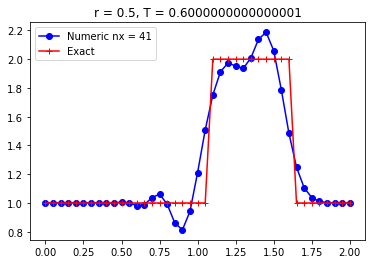

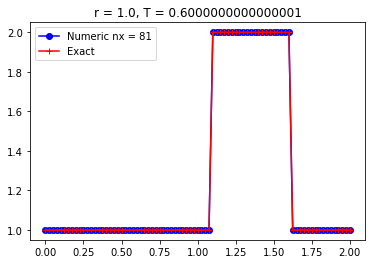

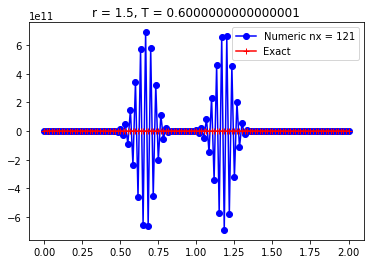

In [9]:
nx_list = [41,81,121]
for nx in nx_list:
    # вспомогательные структуры (аналогично примеру)
    dx = 2 / (nx - 1) 
    nt = 25   
    dt = 0.025 
    T = dt * (nt - 1)
    c = 1    
    x_mesh = np.linspace(0, 2, nx) 
    r = c * dt / dx 

    u_init = np.ones(nx + 1)      
    u_init[int(0.5 / dx) : int(1 / dx + 1)] = 2  
    u_exact = np.ones(nx)      
    u_exact[int((0.5 + c * T) / dx) : int((1 + c * T) / dx + 1)] = 2  

    un = np.ones(nx)   
    un_1 = np.zeros(nx)
    u = u_init.copy() 
    for n in range(1, nt):
        un = u.copy()
        # predictor
        for i in range(nx): # шагаем по пространству
            un_1[i] = un[i] - r * (un[i + 1] - un[i])
        # corrector
        for i in range(1, nx): 
            u[i] = (un[i] + un_1[i]) / 2 - r / 2 * (un_1[i] - un_1[i - 1])

    plt.plot(x_mesh, u[:-1], '-bo', label = 'Numeric nx = ' + str(nx))
    plt.plot(x_mesh, u_exact, '-r+', label = 'Exact')
    plt.title('r = {}, T = {}'.format(r, T))
    plt.legend()
    plt.show()

0. Какой у схемы порядок аппроксимации?
1. Удалось ли получить решение? Почему?
2. Почему при решении на 41 узле решение осциллирует, а на 81 узле нет?
3. Объясните причину осцилляций.
4. Совпадает ли схема со схемой Лакса-Вендроффа для данной задачи (Lax–Wendroff method)?

###### Ответы:

0). У данной схемы __2-й порядок аппроксимации__.

1). Схема устойчива при выполнении условия Куранта $\frac{\tau}{h}\max_m|u_m^n|\leq 1$ - для 81-го узла оно ещё выполняется, поэтому удалось получить решение. Но для 121 узла схема находится уже вне области устойчивости, поэтому решение уходит в резонанс.

2-3). Причина аналогичная той, что описана в последнем пункте предыдущего блока ответов на вопросы - гармоники размываются с течением времени для малого числа узлов. А для 81 узла число Куранта равняется единице, групповая скорость приближенного решения совпадает с групповой скоростью точного решения $\Rightarrow$ решение не размывается. 

4). __Да__, для линейного уравнения переноса схема МакКормака эквивалентна схеме Лакса— Вендроффа

#### Часть 3. Монотонная схема высокого порядка

1. Можно ли построить линейную монотонную по Годунову схему с порядком выше первого? Почему?
2. Постройте монотонную схему порядка выше первого и примените к решению задачи из предыдущих частей.

###### Ответы:

1). Согласно теореме Годунова, не существует линейной монотонной по Годунову схемы с порядком выше первого для простейшего одномерного уравнения переноса (доказано в $\href{http://www.mathnet.ru/php/archive.phtml?wshow=paper&jrnid=sm&paperid=4873&option_lang=rus}{статье}$).

2). Рассмотрим нелинейную схему второго порядка:

$$u_{m}^{n} = a_1u_{m-2}^{n} +a_2u_{m-1}^{n} a_3u_{m}^{n} a_4u_{m+1}^{n}$$

коэффициенты равны (вывод в $\href{https://www.researchgate.net/publication/330842419_Monotonnye_raznostnye_shemy_vysokogo_poradka_approksimacii_dla_sistem_uravnenij_giperboliceskogo_tipa}{статье}$):

$$\begin{cases}a_1 = \frac{r^3-r}{6}\\ a_2 = \frac{-r^3+r^2+2r}{2}\\ a_3 = \frac{r^3-2r^2-r+2}{2}\\ a_4 = \frac{-r^3+3r^2-2r}{6};  \end{cases}$$

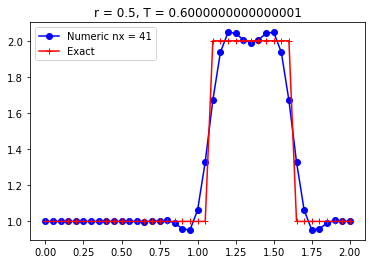

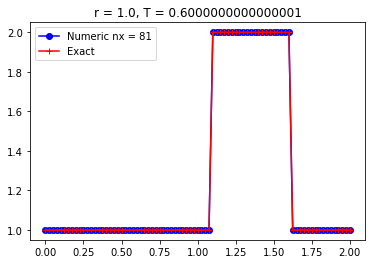

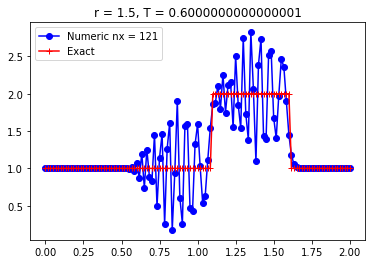

In [10]:
nx_list = [41,81,121]
for nx in nx_list:
    # опять код из примера, комментариями не перегружаю
    dx = 2 / (nx - 1)
    nt = 25   
    dt = 0.025 
    T = dt * (nt - 1)
    c = 1    
    x_mesh = np.linspace(0, 2, nx)
    r = c * dt / dx

    u_init = np.ones(nx)      
    u_init[int(0.5 / dx) : int(1 / dx + 1)] = 2  
    u_exact = np.ones(nx)      
    u_exact[int((0.5 + c * T) / dx) : int((1 + c * T) / dx + 1)] = 2  

    un = np.ones(nx)
    u = u_init.copy()
    for n in range(1, nt):  # шагаем по времени
        un = u.copy() # заполняем данными с предыдущего шага
        for i in range(2, nx - 1): # шагаем по пространству
            u[i] = (r**3 - r) / 6 * un[i - 2] + (-r**3 + r**2 + 2 * r) / 2 * un[i - 1] \
                   + (r**3 - 2 * r**2 - r + 2) / 2 * un[i] + (-r**3 + 3 * r**2 - 2 * r) / 6 * un[i + 1]

    plt.plot(x_mesh, u, '-bo', label = 'Numeric nx = ' + str(nx))
    plt.plot(x_mesh, u_exact, '-r+', label = 'Exact')
    plt.title('r = {}, T = {}'.format(r, T))
    plt.legend()
    plt.show()